## Two electrons in a double well

We now encourage you to have a go yourself. A nice system to look at to explore these ideas is a symmetric double well of varying separations. We'll get you started with your first potential, but then it's up to you to run the code yourself. 

Your goal is to 

* plot the exact, non-interacting and LDA electron densities for two (or more if you'd like!) systems of symmetric double wells of varying separations
* see how the densities compare, and
* explain why does the quality of the approximations depends on the separation

Note: You may want to increase your grid size, xmax.

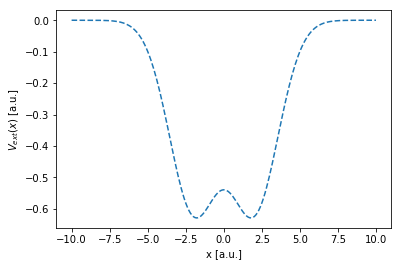

In [1]:
####From below here, this wouldn't be entered in the notebook you'd first open the notebook##
import numpy as np

def symmetric_double_well_separation1(x):
    return -0.6 * np.exp(-0.2 * ((x-2)**2)) -0.6 * np.exp(-0.2 * (x+2)**2)

import matplotlib.pyplot as plt
x = np.linspace(-10,10,201)
plt.plot(x,symmetric_double_well_separation1(x),'--',label="External Potential")
plt.xlabel("x [a.u.]")
plt.ylabel(r"$V_{ext}(x)$ [a.u.]")
plt.show()


In [2]:
from iDEA.input import Input
pm = Input.from_python_file("parameters.py")
pm.run.name = "symmetric_well_run1"
pm.run.LDA = True
pm.run.verbosity = "low"
pm.sys.grid = 201
pm.sys.xmax = 20.0
pm.sys.v_ext = symmetric_double_well_separation1

#Checking that we've got everything turned on that we want
print(pm.run)
print(pm.sys)

name = 'symmetric_well_run1'
time_dependence = False
verbosity = 'low'
save = True
module = 'iDEA'
NON = True
LDA = True
MLP = False
HF = False
EXT = True
MBPT = False
HYB = False
LAN = False

NE = 2
grid = 201
stencil = 3
xmax = 20.0
tmax = 1.0
imax = 1001
acon = 1.0
interaction_strength = 1.0
im = 0
v_ext = <function symmetric_double_well_separation1 at 0x10f092bf8>
v_pert = <function v_pert at 0x118a66950>
v_pert_im = <function v_pert_im at 0x118a669d8>



In [3]:
results = pm.execute()

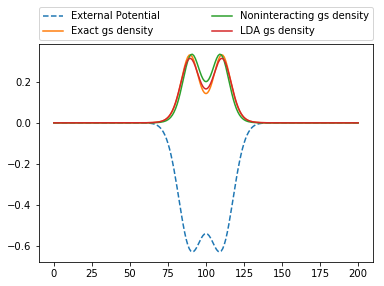

In [5]:
import matplotlib.pyplot as plt

plt.plot(results.ext.gs_ext_vxt, '--', label = "External Potential")
plt.plot(results.ext.gs_ext_den, label = "Exact gs density")
plt.plot(results.non.gs_non_den, label = "Noninteracting gs density")
plt.plot(results.lda.gs_lda2_den, label = "LDA gs density")
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
plt.show()